- 실제 회귀모델에서는 평균값을 선택한다.
- 분류는 가장 많이 나온 것을 선택한다.
- 랜덤 포레스트는 분류모델과 회귀 모델 둘 다 사용 가능하다.

In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
iris = datasets.load_iris()
print('아이리스 종류 :', iris.target_names)
print('target : [0:setosa, 1:versicolor, 2:virginica]')
print('데이터 수 :', len(iris.data))
print('데이터 열 이름 :', iris.feature_names)


아이리스 종류 : ['setosa' 'versicolor' 'virginica']
target : [0:setosa, 1:versicolor, 2:virginica]
데이터 수 : 150
데이터 열 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
data = pd.DataFrame(
 {
 'sepal length': iris.data[:, 0],
 'sepal width': iris.data[:, 1],
 'petal length': iris.data[:, 2],
 'petal width': iris.data[:, 3],
 'species': iris.target
 }
)
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
x = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']


In [5]:
# 테스트 데이터 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train)
print(x_test)
print(y_train)
print(y_test)


     sepal length  sepal width  petal length  petal width
125           7.2          3.2           6.0          1.8
74            6.4          2.9           4.3          1.3
120           6.9          3.2           5.7          2.3
76            6.8          2.8           4.8          1.4
84            5.4          3.0           4.5          1.5
..            ...          ...           ...          ...
48            5.3          3.7           1.5          0.2
121           5.6          2.8           4.9          2.0
98            5.1          2.5           3.0          1.1
132           6.4          2.8           5.6          2.2
4             5.0          3.6           1.4          0.2

[105 rows x 4 columns]
     sepal length  sepal width  petal length  petal width
18            5.7          3.8           1.7          0.3
28            5.2          3.4           1.4          0.2
105           7.6          3.0           6.6          2.1
8             4.4          2.9           1.4    

In [8]:
# 학습 진행
# n_estimators : 의사결정트리 개수(T)를 의미. default는 10
forest = RandomForestClassifier(n_estimators=100)
forest
forest.fit(x_train, y_train)

RandomForestClassifier()

In [9]:
# 예측
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))


[0 0 2 0 0 1 1 2 2 0 2 0 0 0 2 0 1 0 0 1 2 1 0 1 0 2 2 2 2 0 0 2 2 1 2 2 0
 2 1 0 1 1 1 1 2]
[0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1]


In [10]:
# 성능 평가 확인
# 분류 예측 모듈의 평가에는 Accuracy뿐만 아니라 Precision, Recall도 많이 사용된다.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        13
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [12]:
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


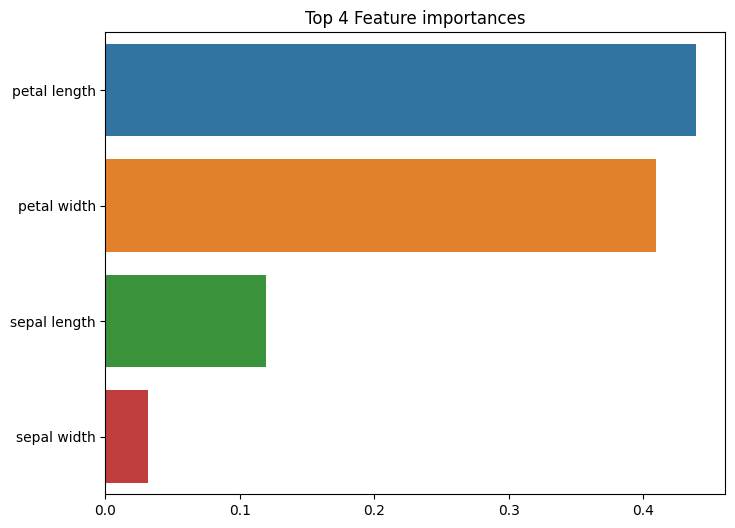

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances_values = forest.feature_importances_
feature_importances = pd.Series(feature_importances_values, index = x_train.columns)
feature_top4 = feature_importances.sort_values(ascending = False)[:4]

plt.figure(figsize=(8,6))
plt.title("Top 4 Feature importances")
sns.barplot(x=feature_top4, y=feature_top4.index)
plt.show()

### GridSearchCV 로 최적의 조합찾기
- n_estimator
- max_features
- max_depth
- min_samples_leaf
- min_samples_split

이 다섯 개 찾기


In [19]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold

# params = {'n_estimatiors': [15,17,20,22,25,27,30,33,35,37,40],
#          'max_features': [2,3,4],
#          'max_depth': [2,3,4,5,6],
#           'min_samples_leaf': [2,3,4,5,6,7],
#           'min_samples_split': [2,3,4,5,6,7]
#          }
# cv = KFold(n_splits = 5 , shuffle = True, random_state = 0)
# rf = RandomForestClassifier()
# grid_cv = GridSearchCV(rf,param_grid=params, cv = cv , n_jobs= -1)
# grid_cv.fit(x_train, y_train)

# print('Best Estimator:\n', grid_cv.best_estimator_)
# print('Best Params:\n', grid_cv.best_params_)
# print('Best Score:\n', grid_cv.best_score_)


ValueError: Invalid parameter n_estimatiors for estimator RandomForestClassifier(max_depth=2, max_features=2, min_samples_leaf=2). Check the list of available parameters with `estimator.get_params().keys()`.

### 유방암 데이터 사용 실습예제 -2

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
# 유방암 데이터셋 로드
cancer = load_breast_cancer()
cancer.data.shape


(569, 30)

In [23]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [26]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))
# 특성 중요도
print("특성 중요도 : \n{}".format(forest.feature_importances_))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972
특성 중요도 : 
[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


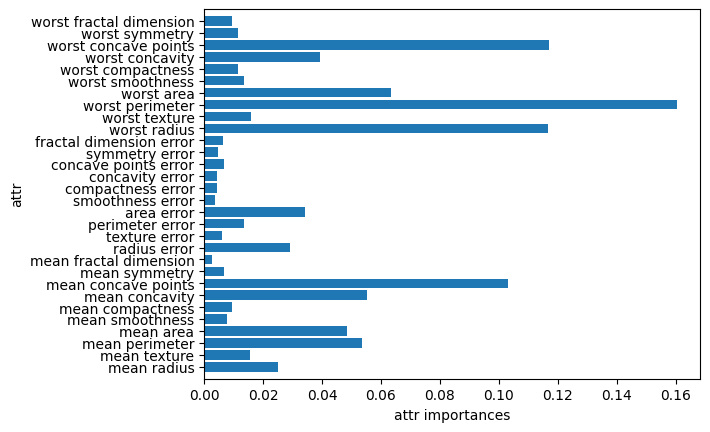

In [27]:
# 특성 중요도 시각화 하기
n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("attr importances")
plt.ylabel("attr")
plt.ylim(-1, n_features)
plt.show()

## 독버섯 예제 실습